In [32]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import numpy as np
import pandas as pd


In [33]:
data = pd.read_csv('Valores.csv')

variables_independientes = ['GGrr (s)','yyrr (s)','rrGG (s)','rryy (s)','Autos r_0', 'Autos r_1']
variable_dependiente = 'Tiempo promedio'

X = data[variables_independientes]
y = data[variable_dependiente]

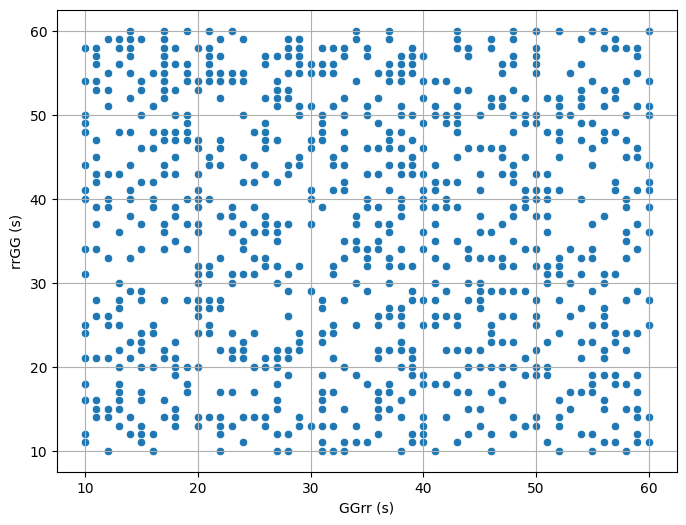

In [34]:
import matplotlib.pyplot as plt
import seaborn as sns


plt.figure(figsize=(8, 6))
sns.scatterplot(x=data['GGrr (s)'], y=data['rrGG (s)'])
plt.grid(True)
plt.show()

In [4]:
import sys
print(sys.executable)

c:\Users\emman\AppData\Local\Programs\Python\Python39\python.exe


In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [8]:
X_train

,GGrr (s),yyrr (s),rrGG (s),rryy (s),Autos r_0,Autos r_1
29,54,2,49,2,15000,28000
535,32,4,10,2,3500,16000
695,40,2,54,2,3500,14000
557,17,5,60,5,7500,14000
836,35,3,46,3,3500,8000
...,...,...,...,...,...,...
106,10,5,25,4,4500,18000
270,59,3,57,4,17500,10000
860,58,3,28,5,1500,12000
435,51,5,43,4,15500,2000


In [9]:
scaler = StandardScaler()
scaler.fit(X_train) 
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [10]:
modelo1 = make_pipeline( PolynomialFeatures(degree=1), LinearRegression())

In [11]:
modelo1.fit(X_train, y_train)

Pipeline(steps=[('polynomialfeatures', PolynomialFeatures(degree=1)),
                ('linearregression', LinearRegression())])

In [12]:
y_pred= modelo1.predict(X_test)

In [13]:
from sklearn.metrics import mean_squared_error, r2_score

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f"Error cuadrático medio: {mse}")
print(f"R^2 = {r2}")

Error cuadrático medio: 225.88111688665765
R^2 = 0.023028979356689572


In [14]:
modelo2 = make_pipeline( PolynomialFeatures(degree=2), LinearRegression())
modelo2.fit(X_train, y_train)
y_pred2= modelo2.predict(X_test)
from sklearn.metrics import mean_squared_error, r2_score

mse = mean_squared_error(y_test, y_pred2)
r2 = r2_score(y_test, y_pred2)
print(f"Error cuadrático medio: {mse}")
print(f"R^2 = {r2}")

Error cuadrático medio: 67.04123537701591
R^2 = 0.7100362126138378


In [15]:
modelo3 = make_pipeline( PolynomialFeatures(degree=3), LinearRegression())
modelo3.fit(X_train, y_train)
y_pred3= modelo3.predict(X_test)


mse = mean_squared_error(y_test, y_pred3)
r2 = r2_score(y_test, y_pred3)
print(f"Error cuadrático medio: {mse}")
print(f"R^2 = {r2}")

Error cuadrático medio: 39.50582539422286
R^2 = 0.8291311505418268


In [93]:
X_test[:1]

,GGrr (s),yyrr (s),rrGG (s),rryy (s),Autos r_0,Autos r_1
521,22,5,47,5,9500,12000


In [69]:
y_pred3

array([58.99380588, 68.82973357, 57.16854498, 67.05947438, 69.10196113,
       51.15827186, 50.84640713, 54.903072  , 46.80017633, 60.88663911,
       40.95712868, 56.45233909, 45.98921493, 42.85854198, 46.09270379,
       65.13709111, 65.77555151, 72.9671646 , 43.89842241, 70.79075048,
       49.38729328, 45.76183468, 49.29564605, 53.84652085, 43.64478129,
       53.86015108, 66.05931856, 64.99898356, 49.44047814, 67.33285858,
       53.79931031, 87.63664787, 70.51253342, 56.65779355, 50.72303059,
       79.86677103, 47.74771914, 90.80492568, 55.36842361, 74.85080223,
       44.30135956, 49.60758081, 51.37982334, 46.32814246, 46.84168248,
       69.94449086, 58.32491951, 73.18195876, 44.01040564, 92.61097704,
       55.87109313, 50.14578402, 93.96598346, 49.64146369, 50.3055498 ,
       44.63600282, 67.63621777, 61.62605467, 50.30058496, 49.98266758,
       45.1848984 , 61.66890768, 46.25491996, 67.29005927, 54.30135072,
       51.11967251, 60.0991673 , 52.28217171, 49.81843664, 43.97

In [14]:
modelo4 = make_pipeline( PolynomialFeatures(degree=4), LinearRegression())
modelo4.fit(X_train, y_train)
y_pred4= modelo4.predict(X_test)


mse = mean_squared_error(y_test, y_pred4)
r2 = r2_score(y_test, y_pred4)
print(f"Error cuadrático medio: {mse}")
print(f"R^2 = {r2}")

Error cuadrático medio: 49.113058191115186
R^2 = 0.7875783719806713


In [15]:
modelo4 = make_pipeline( PolynomialFeatures(degree=4), LinearRegression())
modelo4.fit(X_train, y_train)
y_pred4b= modelo4.predict(X_train)


mse = mean_squared_error(y_train, y_pred4b)
r2 = r2_score(y_train, y_pred4b)
print(f"Error cuadrático medio: {mse}")
print(f"R^2 = {r2}")

Error cuadrático medio: 39.131896777291125
R^2 = 0.8220114356424766


In [16]:
y_pred3b= modelo3.predict(X_train)


mse = mean_squared_error(y_train, y_pred3b)
r2 = r2_score(y_train, y_pred3b)
print(f"Error cuadrático medio: {mse}")
print(f"R^2 = {r2}")

Error cuadrático medio: 34.04077070462721
R^2 = 0.8451680494348973


In [17]:
# Obtener los nombres de las características transformadas
modelo_p1 = modelo1.named_steps['linearregression']
transformador = modelo1.named_steps['polynomialfeatures']
nombres_variables = transformador.get_feature_names_out(input_features=X_train.columns)

# Asociar coeficientes a los nombres de las variables
for nombre, coef in zip(nombres_variables, modelo_p1.coef_):
    print(f"{nombre}: {coef}")

1: 0.0
GGrr (s): -0.0910411227979311
yyrr (s): 0.8153865553952901
rrGG (s): -0.34745829821886554
rryy (s): 1.011248313975718
Autos r_0: -3.118191127514244e-05
Autos r_1: 3.74218187110798e-05


In [18]:
# Obtener los nombres de las características transformadas
modelo_p2 = modelo2.named_steps['linearregression']
transformador = modelo2.named_steps['polynomialfeatures']
nombres_variables = transformador.get_feature_names_out(input_features=X_train.columns)

# Asociar coeficientes a los nombres de las variables
for nombre, coef in zip(nombres_variables, modelo_p2.coef_):
    print(f"{nombre}: {coef}")


1: 2.353724977796336e-08
GGrr (s): -0.7316757468281192
yyrr (s): 7.625696509746962
rrGG (s): -0.8238065968474048
rryy (s): 3.1578461786545757
Autos r_0: 9.76703267092507e-05
Autos r_1: 0.0002732586681514916
GGrr (s)^2: 0.03047033841117656
GGrr (s) yyrr (s): -0.010683439965149914
GGrr (s) rrGG (s): -0.038711261905141195
GGrr (s) rryy (s): -0.008784410215157879
GGrr (s) Autos r_0: -2.0393911168676263e-06
GGrr (s) Autos r_1: 1.3596441233510508e-07
yyrr (s)^2: -0.4042938002395106
yyrr (s) rrGG (s): -0.04684851417383641
yyrr (s) rryy (s): -0.33073191829882326
yyrr (s) Autos r_0: 9.697031994942408e-07
yyrr (s) Autos r_1: -2.9058956329716625e-05
rrGG (s)^2: 0.029560360672308383
rrGG (s) rryy (s): -0.025227724249159866
rrGG (s) Autos r_0: -1.2677579397787116e-06
rrGG (s) Autos r_1: -3.1087436444588485e-07
rryy (s)^2: 0.10414468638729707
rryy (s) Autos r_0: -2.2964579423440077e-06
rryy (s) Autos r_1: -2.052531914273084e-05
Autos r_0^2: 5.017207027620164e-10
Autos r_0 Autos r_1: 1.83098003703830

In [19]:
# Obtener los nombres de las características transformadas
modelo_p3 = modelo3.named_steps['linearregression']
transformador = modelo3.named_steps['polynomialfeatures']
nombres_variables = transformador.get_feature_names_out(input_features=X_train.columns)

# Asociar coeficientes a los nombres de las variables
for nombre, coef in zip(nombres_variables, modelo_p3.coef_):
    print(f"{nombre}: {coef}")

1: 3.0982786977334566e-06
GGrr (s): 0.0029476580559175025
yyrr (s): 0.00037836995307879463
rrGG (s): -0.015869017309823204
rryy (s): 0.002068617774655138
Autos r_0: -0.0010945047629790888
Autos r_1: 0.0005905400079000039
GGrr (s)^2: 0.08455174881809688
GGrr (s) yyrr (s): -0.050669352894662914
GGrr (s) rrGG (s): -0.15325582552343284
GGrr (s) rryy (s): 0.06137719917407413
GGrr (s) Autos r_0: -2.4755754804305836e-05
GGrr (s) Autos r_1: -1.2885250257825357e-05
yyrr (s)^2: 0.012452529951519707
yyrr (s) rrGG (s): -0.06070685759317243
yyrr (s) rryy (s): 0.0072904965246612646
yyrr (s) Autos r_0: 0.0007952020755282537
yyrr (s) Autos r_1: -7.523441925534147e-05
rrGG (s)^2: 0.0713430892277824
rrGG (s) rryy (s): -0.07293088605065869
rrGG (s) Autos r_0: -6.159506407528944e-06
rrGG (s) Autos r_1: -2.4329570114965532e-05
rryy (s)^2: 0.015713658581326735
rryy (s) Autos r_0: -6.074962508493563e-05
rryy (s) Autos r_1: 0.00022758809676376505
Autos r_0^2: 3.7544236468399496e-08
Autos r_0 Autos r_1: 9.9502

In [25]:
nombres_variables

array(['1', 'GGrr (s)', 'yyrr (s)', 'rrGG (s)', 'rryy (s)', 'Autos r_0',
       'Autos r_1', 'GGrr (s)^2', 'GGrr (s) yyrr (s)',
       'GGrr (s) rrGG (s)', 'GGrr (s) rryy (s)', 'GGrr (s) Autos r_0',
       'GGrr (s) Autos r_1', 'yyrr (s)^2', 'yyrr (s) rrGG (s)',
       'yyrr (s) rryy (s)', 'yyrr (s) Autos r_0', 'yyrr (s) Autos r_1',
       'rrGG (s)^2', 'rrGG (s) rryy (s)', 'rrGG (s) Autos r_0',
       'rrGG (s) Autos r_1', 'rryy (s)^2', 'rryy (s) Autos r_0',
       'rryy (s) Autos r_1', 'Autos r_0^2', 'Autos r_0 Autos r_1',
       'Autos r_1^2', 'GGrr (s)^3', 'GGrr (s)^2 yyrr (s)',
       'GGrr (s)^2 rrGG (s)', 'GGrr (s)^2 rryy (s)',
       'GGrr (s)^2 Autos r_0', 'GGrr (s)^2 Autos r_1',
       'GGrr (s) yyrr (s)^2', 'GGrr (s) yyrr (s) rrGG (s)',
       'GGrr (s) yyrr (s) rryy (s)', 'GGrr (s) yyrr (s) Autos r_0',
       'GGrr (s) yyrr (s) Autos r_1', 'GGrr (s) rrGG (s)^2',
       'GGrr (s) rrGG (s) rryy (s)', 'GGrr (s) rrGG (s) Autos r_0',
       'GGrr (s) rrGG (s) Autos r_1', 'GGrr (

In [23]:
coeficientes = modelo_p3.coef_

In [22]:
ordenada=modelo_p3.intercept_

In [27]:
len(nombres_variables)

84

In [21]:
import numpy as np
from scipy.optimize import minimize



def modelo_predict(vars_to_optimize, r0, r1):
    GGrr, yyrr, rrGG, rryy = vars_to_optimize
    df_input = pd.DataFrame([{
        'GGrr (s)': GGrr,
        'yyrr (s)': yyrr,
        'rrGG (s)': rrGG,
        'rryy (s)': rryy,
        'Autos r_0': r0,
        'Autos r_1': r1
    }])
    return modelo3.predict(df_input)[0]

# Esta función hace la optimización
def minimizar_modelo(r0, r1):
    def objective(x):  # x contiene GGrr, yyrr, rrGG, rryy
        return modelo_predict(x, r0, r1)

    x0 = np.array([35, 3.5, 35, 3.5])  # valores iniciales arbitrarios
    bounds = [(10, 60), (2, 5), (10, 60), (2, 5)]  

    result = minimize(objective, x0, bounds=bounds)

    if result.success:
        GGrr, yyrr, rrGG, rryy = result.x
        print(f"Valores óptimos para r0 = {r0}, r1 = {r1}:")
        print(f"GGrr  = {GGrr}")
        print(f"yyrr  = {yyrr}")
        print(f"rrGG  = {rrGG}")
        print(f"rryy  = {rryy}")
        print(f"Valor mínimo del modelo: {result.fun}")
        return result.x, result.fun
    else:
        raise RuntimeError("Optimización fallida:", result.message)


In [23]:
minimizar_modelo(9500, 12000)

Valores óptimos para r0 = 9500, r1 = 12000:
GGrr  = 36.02570380736184
yyrr  = 2.0
rrGG  = 43.52664282834671
rryy  = 2.0
Valor mínimo del modelo: 41.28885210770856


(array([36.02570381,  2.        , 43.52664283,  2.        ]),
 np.float64(41.28885210770856))

In [24]:
f0 = [i for i in range(1500,25000, 2000)]
f1 = [i for i in range(2000,30000, 2000)]

tiempos = []

for r0, r1 in zip(f0, f1):
    tiempos.append(minimizar_modelo(r0, r1)[1])

Valores óptimos para r0 = 1500, r1 = 2000:
GGrr  = 31.00320104378097
yyrr  = 3.3860787138600195
rrGG  = 36.184010950252635
rryy  = 2.0
Valor mínimo del modelo: 43.45073714077768
Valores óptimos para r0 = 3500, r1 = 4000:
GGrr  = 32.125449202746175
yyrr  = 3.228291640266727
rrGG  = 37.90334298005741
rryy  = 2.0
Valor mínimo del modelo: 43.0683290983893
Valores óptimos para r0 = 5500, r1 = 6000:
GGrr  = 32.891496713454416
yyrr  = 2.0
rrGG  = 38.861231527512395
rryy  = 2.0
Valor mínimo del modelo: 42.54734416420806
Valores óptimos para r0 = 7500, r1 = 8000:
GGrr  = 34.5274424941987
yyrr  = 2.0
rrGG  = 41.17457398511516
rryy  = 2.0
Valor mínimo del modelo: 41.90318097252192
Valores óptimos para r0 = 9500, r1 = 10000:
GGrr  = 35.71156094875448
yyrr  = 2.0
rrGG  = 42.97739381920471
rryy  = 2.0
Valor mínimo del modelo: 41.37216537696287
Valores óptimos para r0 = 11500, r1 = 12000:
GGrr  = 36.56224109318335
yyrr  = 2.0
rrGG  = 44.37273866527802
rryy  = 2.0
Valor mínimo del modelo: 40.942463894

In [22]:
minimizar_modelo(25000, 30000)

Valores óptimos para r0 = 25000, r1 = 30000:
GGrr  = 36.30056413700853
yyrr  = 5.0
rrGG  = 51.12195141737276
rryy  = 2.0
Valor mínimo del modelo: 39.1963570595197


(array([36.30056414,  5.        , 51.12195142,  2.        ]),
 np.float64(39.1963570595197))

In [124]:
tiempos

[np.float64(43.45073714077768),
 np.float64(43.0683290983893),
 np.float64(42.54734416420806),
 np.float64(41.90318097252192),
 np.float64(41.37216537696287),
 np.float64(40.94246389468273),
 np.float64(40.595303470498095),
 np.float64(40.307469878901244),
 np.float64(40.0526840571337),
 np.float64(39.80239928888994),
 np.float64(39.52632974927957),
 np.float64(39.026102612316144)]

In [102]:
modelo3.predict(X_test[:1])[0]

np.float64(58.99380588231478)

In [128]:
df_input = pd.DataFrame([{
        'GGrr (s)': 36.30056414,
        'yyrr (s)': 5,
        'rrGG (s)': 51.12195142,
        'rryy (s)': 2,
        'Autos r_0': 25000,
        'Autos r_1': 30000
    }])

modelo3.predict(df_input)

array([39.19635706])

In [265]:
# Obtener los nombres de las características transformadas
modelo_p4 = modelo4.named_steps['linearregression']
transformador = modelo4.named_steps['polynomialfeatures']
nombres_variables = transformador.get_feature_names_out(input_features=X_train.columns)

# Asociar coeficientes a los nombres de las variables
for nombre, coef in zip(nombres_variables, modelo_p4.coef_):
    print(f"{nombre}: {coef}")

1: 0.002949855025857981
GGrr (s): 0.0010682007740936506
yyrr (s): -0.0035062499792441054
rrGG (s): -0.0019689094232114633
rryy (s): -0.0016531165192788977
Autos r_0: -0.02123915025153512
Autos r_1: -0.02616343249285227
GGrr (s)^2: -0.0018750148008878293
GGrr (s) yyrr (s): -0.00043365042815369197
GGrr (s) rrGG (s): -0.0036874071065245307
GGrr (s) rryy (s): -5.41009194062043e-09
GGrr (s) Autos r_0: 0.0013774124634169166
GGrr (s) Autos r_1: -0.0009718756724435955
yyrr (s)^2: 4.75530237829716e-05
yyrr (s) rrGG (s): 0.0001002573105683158
yyrr (s) rryy (s): 6.133225807662306e-05
yyrr (s) Autos r_0: -0.00611229025942471
yyrr (s) Autos r_1: 0.017326799572025754
rrGG (s)^2: 4.663191369241735e-05
rrGG (s) rryy (s): 0.00035820535249433564
rrGG (s) Autos r_0: 0.000433791448786956
rrGG (s) Autos r_1: 0.00034989658252505303
rryy (s)^2: 8.387057826063726e-05
rryy (s) Autos r_0: 0.004438881920956218
rryy (s) Autos r_1: -0.008731863293646506
Autos r_0^2: -1.5297526403984478e-06
Autos r_0 Autos r_1: 4.0

In [267]:
modelo_p4.coef_

array([ 2.94985503e-03,  1.06820077e-03, -3.50624998e-03, -1.96890942e-03,
       -1.65311652e-03, -2.12391503e-02, -2.61634325e-02, -1.87501480e-03,
       -4.33650428e-04, -3.68740711e-03, -5.41009194e-09,  1.37741246e-03,
       -9.71875672e-04,  4.75530238e-05,  1.00257311e-04,  6.13322581e-05,
       -6.11229026e-03,  1.73267996e-02,  4.66319137e-05,  3.58205352e-04,
        4.33791449e-04,  3.49896583e-04,  8.38705783e-05,  4.43888192e-03,
       -8.73186329e-03, -1.52975264e-06,  4.01547053e-06,  1.80155308e-06,
        1.35558097e-03, -1.08350367e-02,  2.22826094e-03, -1.43450050e-03,
       -1.19717152e-05,  1.12858940e-05, -2.28823091e-03, -1.42713652e-02,
       -1.01784928e-03, -1.46941564e-04,  1.14034653e-04, -3.56870017e-03,
       -5.50651374e-03, -1.68071368e-05,  9.97380586e-07,  3.20343670e-04,
       -2.76382801e-04,  2.31626041e-04,  3.03690711e-08, -3.14477678e-08,
        6.19829674e-09, -1.17854497e-06,  1.53353810e-04,  1.79175277e-05,
        2.41130227e-03, -

In [237]:

variables_independientes = ['GGrr (s)','yyrr (s)','rrGG (s)','rryy (s)','Autos r_0', 'Autos r_1']
variable_dependiente = 'Tiempo promedio'

X = data[variables_independientes]
y = data[variable_dependiente]

In [181]:
coefs = lin_reg.coef_
intercept = lin_reg.intercept_


NameError: name 'lin_reg' is not defined

In [ ]:
feature_names = poly_feat.get_feature_names_out(['GGrr (s)', 'yyrr (s)', 'rrGG (s)', 'rryy (s)'])

In [ ]:
feature_names

In [17]:
for name, coef in zip(feature_names, coefs):
    print(f"{name}: {coef}")
print(f"intercepto: {intercept}")

1: 4.2459171097966867e-10
GGrr (s): -1.5789641314316465
yyrr (s): 4.379137192455784
rrGG (s): -2.424496698961665
rryy (s): 0.992596308500289
GGrr (s)^2: 0.0702239429890443
GGrr (s) yyrr (s): 0.1480918723605229
GGrr (s) rrGG (s): -0.05043377662273085
GGrr (s) rryy (s): -0.05705583027890128
yyrr (s)^2: -2.4850525715399656
yyrr (s) rrGG (s): 0.2128693314071999
yyrr (s) rryy (s): -1.176908422604607
rrGG (s)^2: 0.0722995806474964
rrGG (s) rryy (s): 0.08232436597283863
rryy (s)^2: 0.3118854688300427
GGrr (s)^3: -0.0007059832102051522
GGrr (s)^2 yyrr (s): -0.0006434202531074955
GGrr (s)^2 rrGG (s): 0.0003528369998931913
GGrr (s)^2 rryy (s): 0.0011605350477642828
GGrr (s) yyrr (s)^2: -0.010436152753095944
GGrr (s) yyrr (s) rrGG (s): -0.0005638983321411342
GGrr (s) yyrr (s) rryy (s): -0.00283681993564934
GGrr (s) rrGG (s)^2: 0.0002475403104067464
GGrr (s) rrGG (s) rryy (s): 0.0005306238418423814
GGrr (s) rryy (s)^2: -0.006035615960955554
yyrr (s)^3: 0.28528647617484304
yyrr (s)^2 rrGG (s): -0.0

In [30]:
data2 = pd.read_csv("Nuevos_valores.csv")

In [32]:
variables_independientes = ['GGrr (s)','yyrr (s)','rrGG (s)','rryy (s)']
variable_dependiente = 'Tiempo promedio'

X_test = data2[variables_independientes]
y_test = data2[variable_dependiente]

In [33]:
y_pred= modelo.predict(X_test)

In [ ]:
from sklearn.metrics import mean_squared_error, r2_score

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f"Error cuadrático medio: {mse}")
print(f"R^2 = {r2}")

Error cuadrático medio: 4.613579314259931
R^2 = 0.8355874111670565


In [69]:
modelo4 = make_pipeline( PolynomialFeatures(degree=4), LinearRegression())
modelo4.fit(X_train_scaled, y_train)
y_pred4= modelo4.predict(X_test_scaled)


mse = mean_squared_error(y_test, y_pred4)
r2 = r2_score(y_test, y_pred4)
print(f"Error cuadrático medio: {mse}")
print(f"R^2 = {r2}")

Error cuadrático medio: 36.20859007224315
R^2 = 0.8433922069869837
